# k-means

In [1]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

In [2]:
y

array([4, 2, 0, ..., 3, 0, 2])

In [3]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [4]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

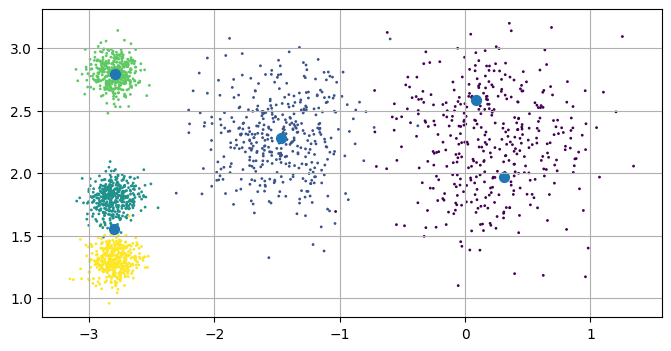

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50)
plt.grid()

plt.show()

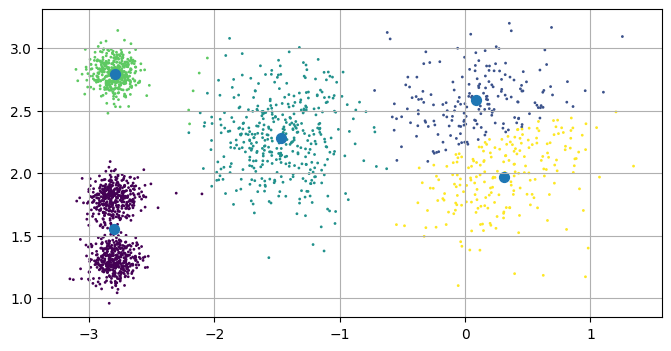

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50)
plt.grid()

plt.show()

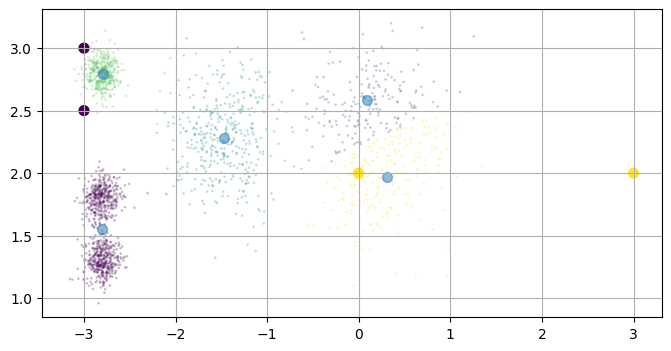

In [7]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
y_new = kmeans.predict(X_new)

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y_pred, alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], s=50, c=y_new)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, alpha=0.5)
plt.grid()

plt.show()

## Centroid initialization methods

In [8]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [ 1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

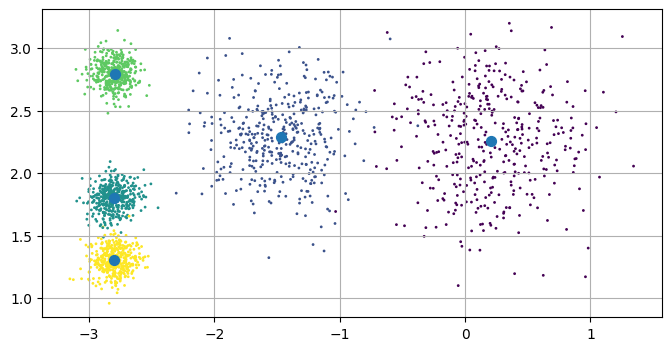

In [9]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50)
plt.grid()

plt.show()

In [10]:
kmeans.inertia_

211.5985372581684

In [11]:
kmeans.score(X)

-211.5985372581684

## Accelerated k-means and mini-batch k-means

In [12]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

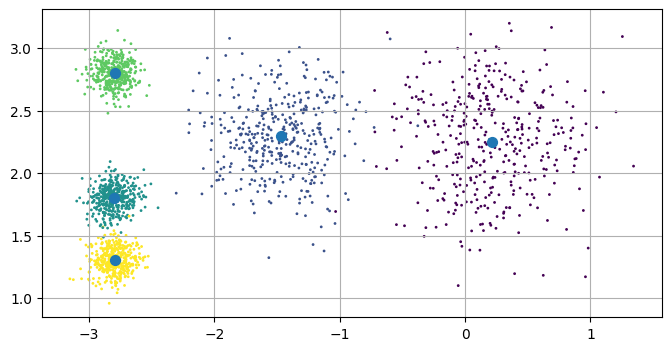

In [13]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1, c=y)
plt.scatter(minibatch_kmeans.cluster_centers_[:, 0], minibatch_kmeans.cluster_centers_[:, 1], s=50)
plt.grid()

plt.show()

## Finding the optimal number of clusters

In [14]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

# Using clustering for image segmentation

In [15]:
import urllib.request
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [16]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

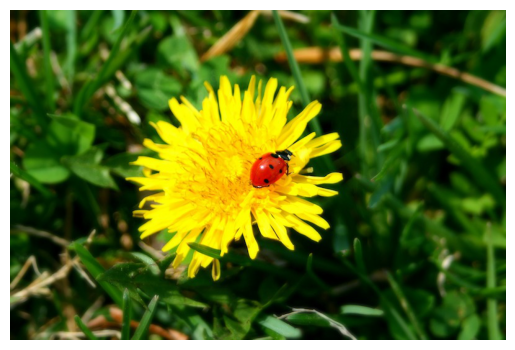

In [17]:
plt.imshow(image)
plt.axis("off")
plt.show()

In [18]:
X = image.reshape(-1, 3) # Reshape to an array of RGB colors
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

# This is NumPy indexing, and works as follows: 
# Select the corresponding value of kmeans.cluster_centers_ based on the index kmeans.labels_ (just an index like any other array).
# The catch is that the resulting value would be the size of the inside array, i.e. kmeans.labels_.
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
segmented_img.shape

(533, 800, 3)

In [19]:
segmented_img[0]/255

array([[0.0220022 , 0.10830368, 0.00568067],
       [0.0220022 , 0.10830368, 0.00568067],
       [0.0220022 , 0.10830368, 0.00568067],
       ...,
       [0.21325479, 0.38075103, 0.05518163],
       [0.21325479, 0.38075103, 0.05518163],
       [0.21325479, 0.38075103, 0.05518163]])

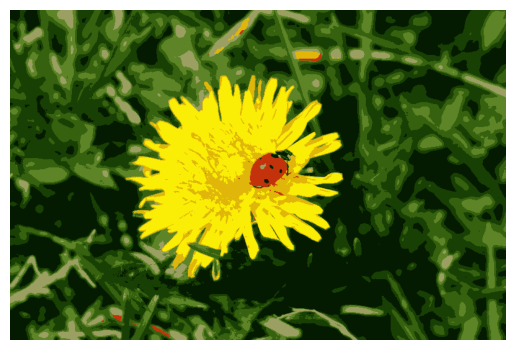

In [20]:
plt.imshow(segmented_img / 255) # Divide by 255 to make the floats fit in the range of 0..1
plt.axis("off")
plt.show()

In [21]:
kmeans.cluster_centers_

array([[  5.6105612 ,  27.61743918,   1.44857047],
       [250.68280046, 237.8319458 ,   6.51237711],
       [ 54.37997208,  97.09151272,  14.07131629],
       [155.1122467 , 160.29920705,  98.37997063],
       [ 93.53208815, 132.47927103,  39.06947451],
       [ 24.39502109,  63.41611633,   4.09118396],
       [195.12454743,  50.81607531,  11.20057929],
       [223.40683449, 182.94424185,   9.39848253]])

In [22]:
kmeans.labels_

array([0, 0, 0, ..., 5, 5, 0], dtype=int32)

# Using clustering for semi-supervised learning

In [23]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [24]:
# Pretend we only have labels for 50 instances, so we train the model only on those
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [25]:
log_reg.score(X_test, y_test)

0.7581863979848866

On full training set (1400 elements) we get 90.9% accuracy.
Let's improve this by, instead of take any 50 instances, divide the training set into 50 clusters and then take the most representative values from each of them, i.e. the closest to each cluster (to the centroid).

In [26]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train) # Transform the values group by the clusters
representative_digit_idx = np.argmin(X_digits_dist, axis=0) # Get an array with the indices with the min value to the centroids (1 entry per k)
X_representative_digits = X_train[representative_digit_idx] # Get the whole digit based on the previous indices
X_representative_digits # Images closest to the centroids

array([[ 0.,  0.,  0., ..., 15., 12.,  0.],
       [ 0.,  0.,  2., ...,  5.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  5., 16., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 14.,  6.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.]])

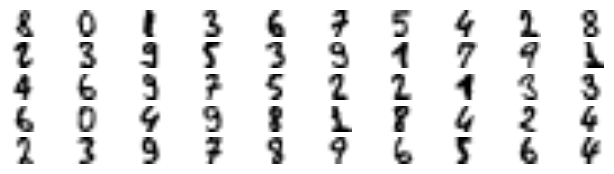

In [27]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [28]:
# We have to label the X_representative manually
y_representative_digits = np.array([
    8, 0, 1, 3, 6, 7, 5, 4, 2, 8,
    2, 3, 9, 5, 3, 9, 1, 7, 9, 1,
    4, 6, 9, 7, 5, 2, 2, 1, 3, 3,
    6, 0, 4, 9, 8, 1, 8, 4, 2, 4,
    2, 3, 9, 7, 8, 9, 6, 5, 6, 4,
])

In [29]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8312342569269522

## Label propagation

It's possible to continue improving the previous score by propagating the labels to all the other instances.

In [30]:
kmeans.labels_

array([31,  2, 38, ...,  7,  7,  5], dtype=int32)

In [31]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [32]:
y_train_propagated[kmeans.labels_ == 2]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
log_reeg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.871536523929471

### Ignore the 1% of instances that are fathest from their cluster center

In [34]:
X_digits_dist.shape

(1400, 50)

In [35]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_] # Get an array of min distances of each cluster
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [36]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8589420654911839

In [37]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9614814814814815

# DBSCAN

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [39]:
dbscan.labels_.shape

(1000,)

In [40]:
dbscan.core_sample_indices_.shape

(787,)

In [41]:
dbscan.components_

array([[ 0.4898502 , -0.3319625 ],
       [ 0.32622039,  0.92280475],
       [-0.67494362,  0.74413584],
       ...,
       [ 1.11834917, -0.50374618],
       [ 0.5439374 ,  0.82757089],
       [ 0.9291672 , -0.47026443]])

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [43]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([2, 3, 1, 4])

In [44]:
knn.predict_proba(X_new)

array([[0.1 , 0.  , 0.7 , 0.18, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.02],
       [0.  , 0.  , 0.  , 0.94, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.06,
        0.  ],
       [0.28, 0.54, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  ,
        0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.54, 0.  , 0.  , 0.4 , 0.06, 0.  , 0.  ,
        0.  ]])

In [45]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1, 10,  9, -1])

# Gaussian Mixtures

In [46]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [47]:
gm.weights_

array([0.18770253, 0.19031882, 0.62197865])

In [48]:
gm.means_

array([[-0.78356377,  0.53528333],
       [ 1.77632521, -0.03245046],
       [ 0.49683288,  0.25047982]])

In [49]:
gm.covariances_

array([[[ 0.03807157,  0.04978697],
        [ 0.04978697,  0.07989972]],

       [[ 0.03936779,  0.050469  ],
        [ 0.050469  ,  0.0801521 ]],

       [[ 0.19340177, -0.12427783],
        [-0.12427783,  0.29679543]]])

## Bayesian Gaussian Mixture Models (Bayesian Information Criterion (BIC))

In [50]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.15, 0.12, 0.13, 0.08, 0.12, 0.17, 0.13, 0.  , 0.09, 0.  ])

7 clusters needed

# Exercises

## 1-9

1. How would you define clustering? Can you name a few clustering algorithms?<br>
R. The process when data is categorized into groups just by proximity and not by labels, to keep the similiar close together.
2. What are some of the main applications of clustering algorithms?<br>
R. Pattern detection (e.g. search for similar images in a search engine. It doesn't matter what it is, just to give the similar ones), fraud detection.
3. Describe two techniques to select the right number of clusters when using k-means.<br>
R. Check for the elbow point of the inertia and a more precise method, but more computationally expensive, compute the silhouette score.
4. What is label propagation? Why would you implement it, and how?<br>
R. When you don't have the labels for the training data you can label some of them manually, and then propagate that labels to other instances. This is done by clustering the data and the algorithm would assign the labels that you enter into the other similar instances in the same clusters. The optimal way would be to select the most representative instances (closest ones from the centroids) and label them. Then propagate the labels. It is also a good idea to eliminate the 1% farthest instances because could be outliers.
5. Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?<br>
R. K-Means for large datasets. DBSCAN for high density regions.
6. Can you think of a use case where active learning would be useful? How would you implement it?<br>
R. When labeling is very costly.
8. What is the difference between anomaly detection and novelty detection?<br>
R. Novelty detection makes the assumption that the training data is clean, i.e. do not contain outliers, which anomaly detection does not.
9. What is a Gaussian mixture? What tasks can you use it for?<br>
R. It's a model that assumes that the data was generated using a gaussian distribution with unknown parameters.
10. Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?<br>
R. Plot Bayesian Information Criterion (BIC) or Akaike Information Criterion (AIC) as a function of the number of clusters and choose the one that minimizes BIC or AIC.

## 10

In [51]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

In [52]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
idx_train_valid, idx_test = next(splitter.split(faces.data, faces.target))

X_train_valid = faces.data[idx_train_valid]
y_train_valid = faces.target[idx_train_valid]

X_test = faces.data[idx_test]
y_test = faces.target[idx_test]


splitter = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=43)
idx_train, idx_valid = next(splitter.split(X_train_valid, y_train_valid))

X_train = X_train_valid[idx_train]
y_train = y_train_valid[idx_train]

X_valid = X_train_valid[idx_valid]
y_valid = y_train_valid[idx_valid]

In [54]:
X_train[0]

array([0.54545456, 0.57438016, 0.59504133, ..., 0.30578512, 0.30165288,
       0.30578512], dtype=float32)

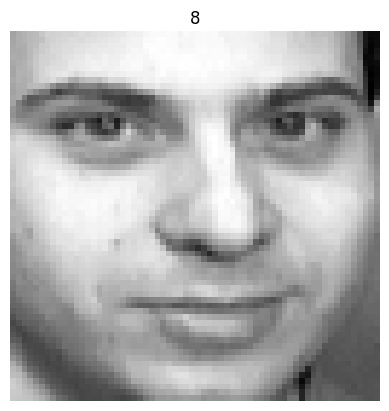

In [55]:
import matplotlib.pyplot as plt

plt.imshow((X_train[0]).reshape(64, 64), cmap="grey")
plt.title(y_train[0])
plt.axis("off")
plt.show()

In [56]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X_train)

In [57]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [58]:
k_range = range(5, 200, 5)
models = []
for k in k_range:
    print(f"k = {k}")
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train)
    models.append(kmeans)

k = 5
k = 10
k = 15
k = 20
k = 25
k = 30
k = 35
k = 40
k = 45
k = 50
k = 55
k = 60
k = 65
k = 70
k = 75
k = 80
k = 85
k = 90
k = 95
k = 100
k = 105
k = 110
k = 115
k = 120
k = 125
k = 130
k = 135
k = 140
k = 145
k = 150
k = 155
k = 160
k = 165
k = 170
k = 175
k = 180
k = 185
k = 190
k = 195


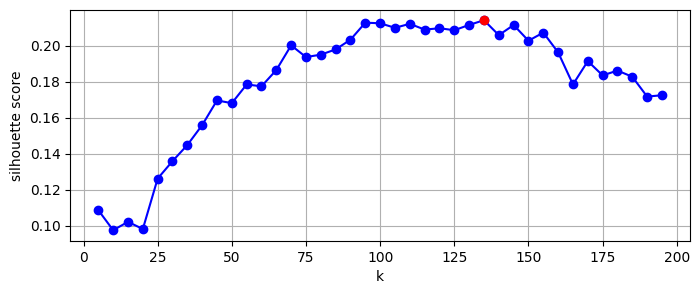

In [59]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train, model.labels_) for model in models]
max_idx = np.argmax(silhouette_scores)
best_score = silhouette_scores[max_idx]
best_k = k_range[max_idx]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.plot(best_k, best_score, "ro")
plt.grid()
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.show()

In [60]:
best_k

135

Cluster 0


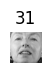

Cluster 1


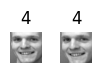

Cluster 2


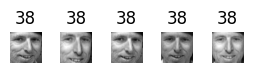

Cluster 3


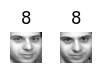

Cluster 4


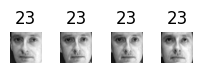

Cluster 5


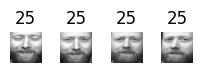

Cluster 6


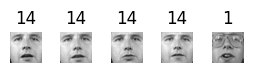

Cluster 7


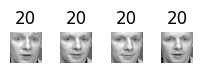

Cluster 8


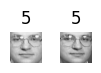

Cluster 9


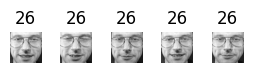

Cluster 10


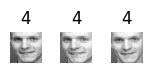

Cluster 11


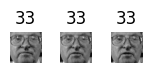

Cluster 12


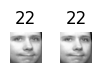

Cluster 13


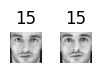

Cluster 14


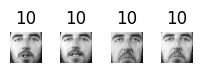

Cluster 15


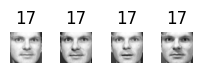

Cluster 16


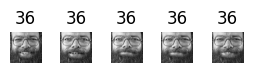

Cluster 17


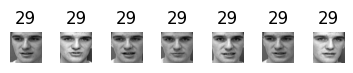

Cluster 18


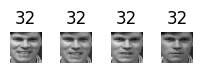

Cluster 19


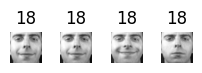

Cluster 20


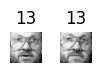

Cluster 21


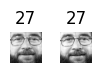

Cluster 22


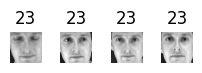

Cluster 23


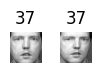

Cluster 24


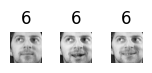

Cluster 25


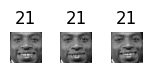

Cluster 26


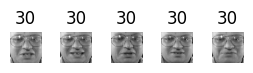

Cluster 27


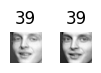

Cluster 28


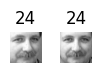

Cluster 29


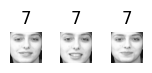

Cluster 30


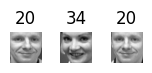

Cluster 31


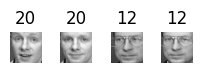

Cluster 32


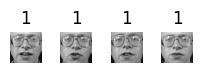

Cluster 33


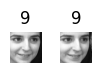

Cluster 34


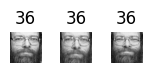

Cluster 35


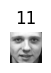

Cluster 36


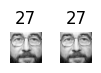

Cluster 37


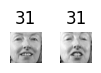

Cluster 38


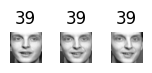

Cluster 39


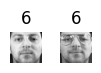

Cluster 40


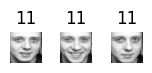

Cluster 41


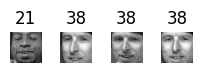

Cluster 42


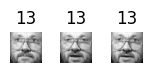

Cluster 43


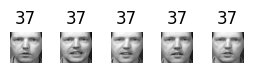

Cluster 44


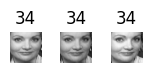

Cluster 45


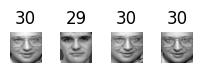

Cluster 46


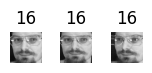

Cluster 47


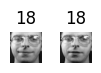

Cluster 48


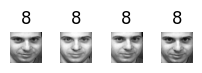

Cluster 49


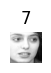

Cluster 50


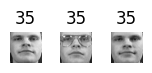

Cluster 51


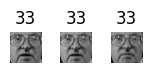

Cluster 52


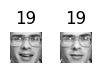

Cluster 53


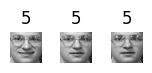

Cluster 54


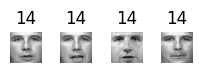

Cluster 55


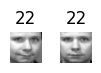

Cluster 56


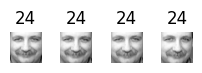

Cluster 57


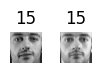

Cluster 58


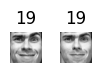

Cluster 59


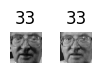

Cluster 60


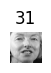

Cluster 61


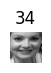

Cluster 62


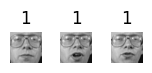

Cluster 63


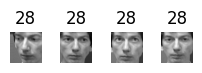

Cluster 64


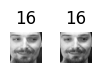

Cluster 65


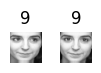

Cluster 66


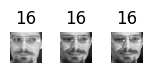

Cluster 67


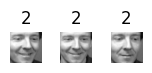

Cluster 68


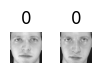

Cluster 69


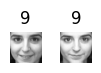

Cluster 70


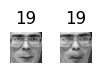

Cluster 71


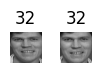

Cluster 72


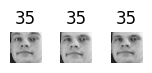

Cluster 73


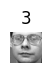

Cluster 74


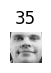

Cluster 75


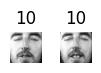

Cluster 76


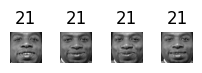

Cluster 77


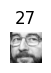

Cluster 78


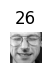

Cluster 79


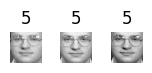

Cluster 80


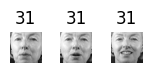

Cluster 81


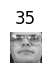

Cluster 82


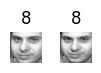

Cluster 83


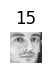

Cluster 84


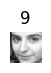

Cluster 85


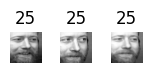

Cluster 86


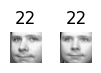

Cluster 87


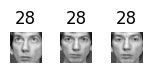

Cluster 88


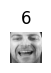

Cluster 89


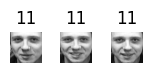

Cluster 90


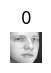

Cluster 91


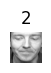

Cluster 92


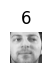

Cluster 93


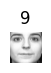

Cluster 94


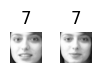

Cluster 95


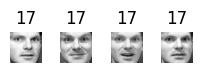

Cluster 96


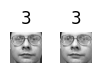

Cluster 97


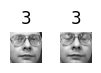

Cluster 98


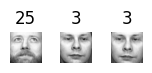

Cluster 99


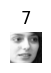

Cluster 100


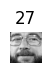

Cluster 101


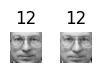

Cluster 102


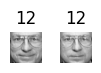

Cluster 103


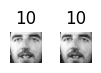

Cluster 104


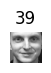

Cluster 105


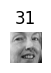

Cluster 106


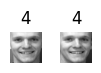

Cluster 107


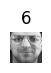

Cluster 108


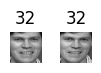

Cluster 109


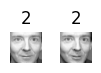

Cluster 110


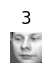

Cluster 111


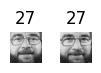

Cluster 112


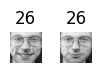

Cluster 113


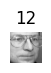

Cluster 114


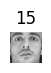

Cluster 115


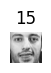

Cluster 116


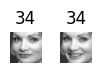

Cluster 117


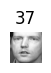

Cluster 118


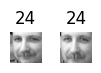

Cluster 119


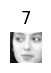

Cluster 120


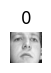

Cluster 121


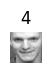

Cluster 122


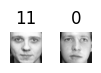

Cluster 123


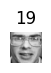

Cluster 124


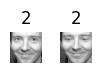

Cluster 125


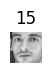

Cluster 126


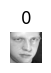

Cluster 127


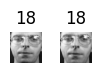

Cluster 128


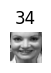

Cluster 129


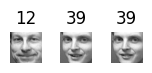

Cluster 130


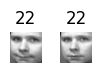

Cluster 131


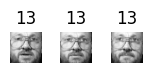

Cluster 132


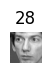

Cluster 133


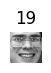

Cluster 134


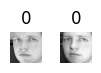

In [61]:
def plot_face(face, label):
    face = face.reshape(64, 64)
    plt.subplot(10, 10, index + 1)
    plt.imshow(face, cmap="grey")
    plt.title(label)
    plt.axis("off")

    plt.show()
    

def plot_faces(faces, labels):
    faces = faces.reshape(-1, 64, 64)
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(10, 10, index + 1)
        plt.imshow(face, cmap="grey")
        plt.title(label)
        plt.axis("off")

    plt.show()

best_model = models[max_idx]
for cluster_id in np.unique(best_model.labels_):
    print(f"Cluster {cluster_id}")
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]

    plot_faces(faces, labels)
    

## 11

In [62]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
clf.score(X_valid, y_valid)

0.925

In [64]:
X_train_reduced = best_model.transform(X_train)
X_test_reduced = best_model.transform(X_test)
X_valid_reduced = best_model.transform(X_valid)

clf_reduced = RandomForestClassifier(random_state=42)
clf_reduced.fit(X_train_reduced, y_train)
clf_reduced.score(X_valid_reduced, y_valid)

0.825

## 12

In [65]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train)

gm = GaussianMixture(n_components=40, n_init=10)
gm.fit(X_train_reduced)

GaussianMixture(n_components=40, n_init=10)

In [66]:
# Generate new faces
n_samples = 20
X_samples_gen, y_samples_gen = gm.sample(n_samples=n_samples)
X_samples = pca.inverse_transform(X_samples_gen)

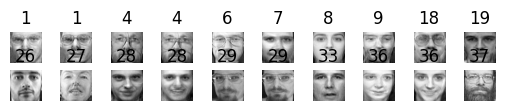

In [67]:
plot_faces(X_samples, y_samples_gen)

Rotate


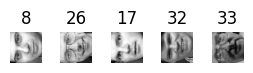


Flip


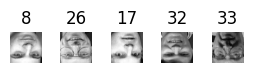


Darken


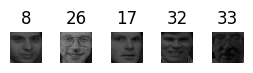

In [68]:
# Modify some images

print("Rotate")
n_rotate = 5
X_rotated = np.transpose(X_train[:n_rotate].reshape(-1, 64, 64), axes=(0, 2, 1))
X_rotated = X_rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotate]
plot_faces(X_rotated, y_rotated)

print()
print("Flip")
n_flip = 5
X_flipped = X_train[:n_flip].reshape(-1, 64, 64)[:, ::-1]
X_flipped = X_flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flip]
plot_faces(X_flipped, y_flipped)

print()
print("Darken")
n_darken = 5
X_darkened = X_train[:n_darken].copy()
X_darkened[:, 1:-1] *= 0.25  # [:-1] would mean every value except the first, because if all values are updated, nothing change (values are floats, so 
                             # the intensity of the gray is relative. By updating every value except one, the relativity breaks.
y_darkened = y_train[:n_darken]
plot_faces(X_darkened, y_darkened)

In [69]:
bad_faces = np.r_[X_rotated, X_flipped, X_darkened]
bad_faces.shape

(15, 4096)

In [70]:
y_bad = np.r_[y_rotated, y_flipped, y_darkened]
y_bad.shape

(15,)

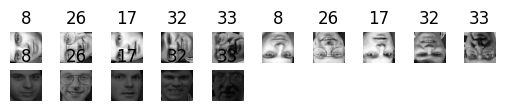

In [71]:
plot_faces(bad_faces, y_bad)

In [72]:
bad_faces_pca = pca.transform(bad_faces)
gm.score_samples(bad_faces_pca)

array([-3.05864242e+07, -3.39050282e+07, -2.79370858e+07, -2.55813164e+07,
       -2.88712759e+07, -3.98519732e+07, -4.73657265e+07, -3.20898138e+07,
       -3.23975158e+07, -4.10037751e+07, -7.51579888e+07, -7.75240390e+07,
       -6.52173547e+07, -9.97622362e+07, -1.03159574e+08])

In [73]:
gm.score_samples(X_train_reduced[:15])

array([1249.60021061, 1258.80068068, 1237.04857174, 1259.66648338,
       1259.67872545, 1273.1381523 , 1222.26861491, 1258.61611245,
       1288.91569481, 1266.92166055, 1259.67872641, 1188.44330336,
       1267.63756806, 1231.91839469, 1208.39273552])

## 13

In [136]:
def plot_faces_original_and_reconstructed(originals, reconstructed):
    faces = [i for i in zip(X_train, X_train_reconstructed)]
    faces = np.array(faces)
    for index, (face) in enumerate(faces):
        plot_faces(face, np.zeros(originals.size))

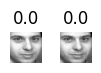

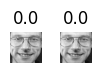

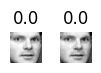

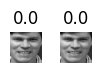

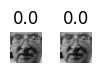

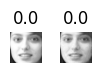

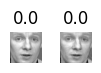

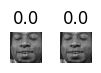

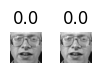

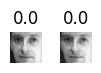

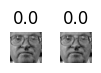

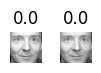

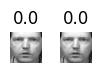

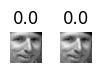

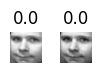

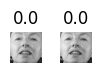

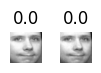

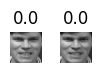

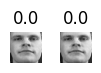

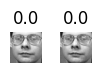

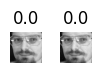

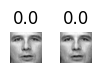

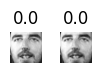

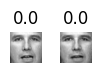

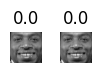

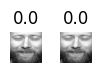

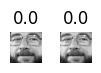

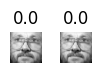

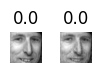

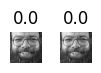

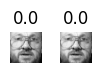

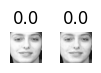

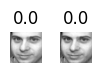

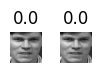

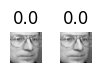

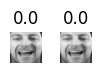

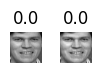

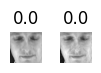

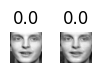

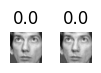

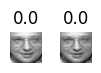

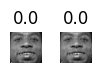

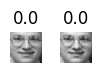

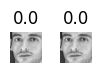

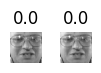

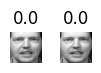

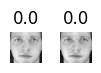

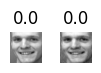

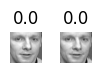

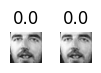

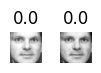

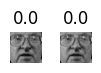

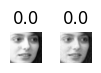

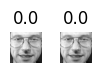

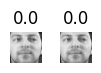

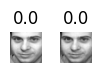

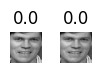

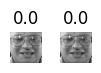

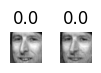

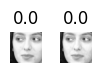

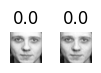

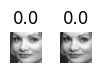

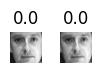

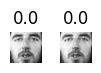

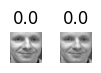

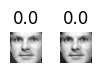

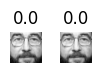

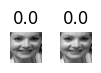

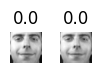

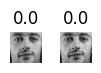

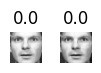

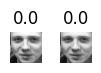

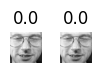

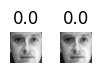

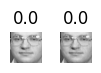

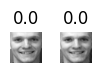

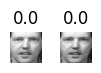

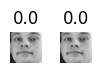

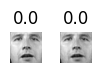

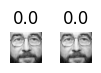

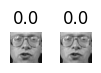

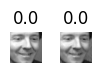

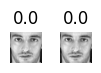

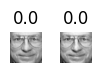

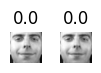

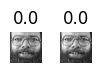

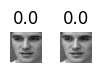

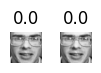

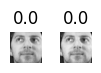

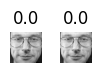

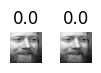

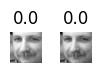

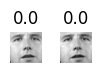

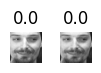

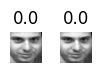

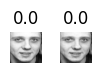

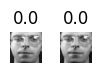

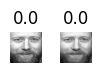

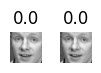

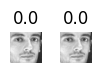

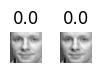

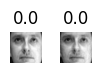

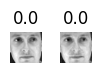

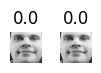

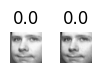

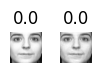

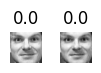

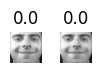

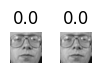

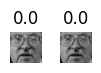

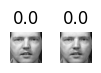

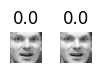

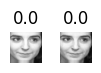

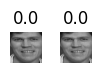

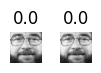

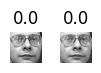

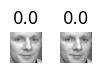

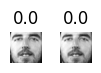

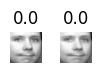

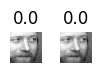

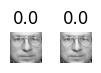

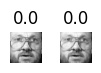

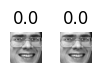

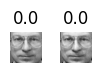

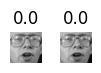

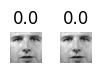

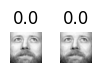

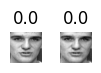

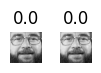

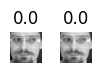

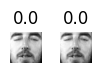

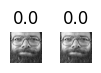

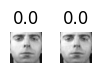

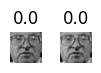

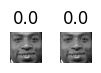

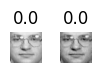

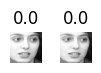

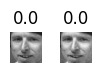

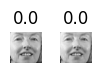

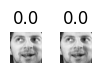

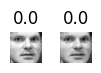

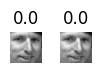

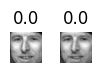

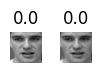

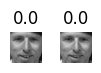

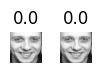

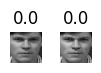

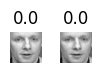

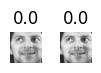

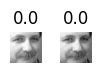

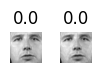

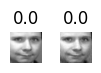

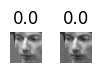

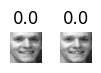

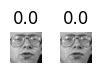

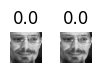

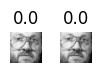

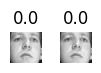

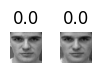

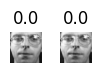

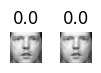

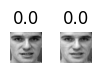

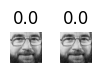

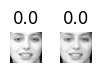

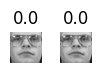

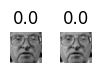

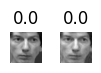

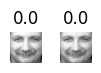

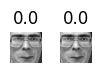

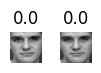

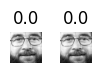

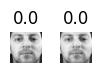

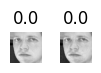

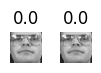

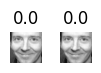

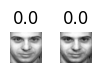

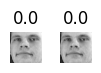

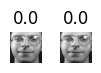

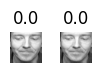

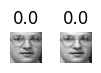

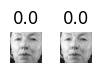

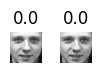

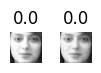

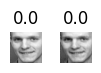

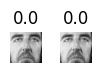

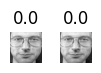

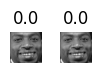

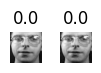

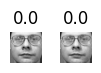

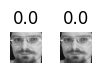

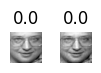

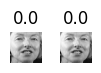

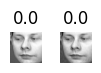

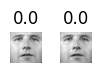

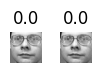

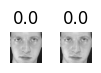

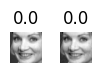

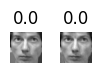

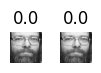

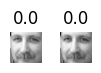

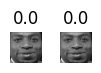

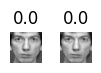

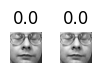

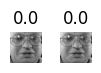

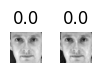

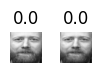

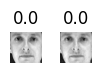

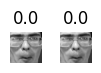

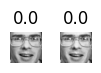

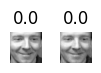

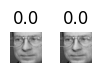

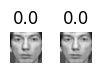

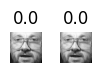

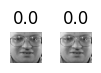

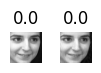

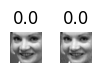

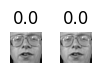

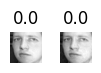

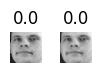

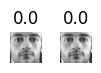

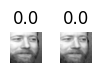

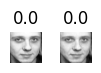

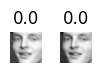

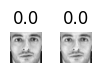

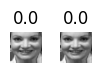

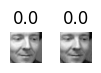

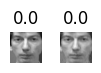

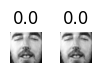

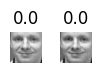

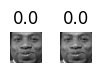

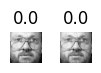

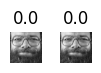

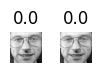

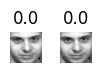

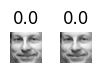

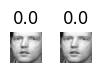

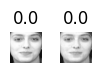

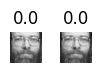

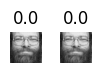

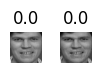

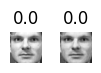

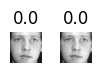

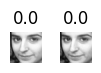

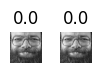

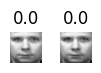

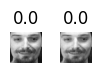

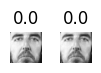

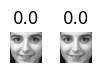

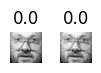

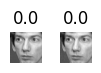

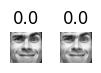

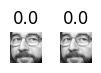

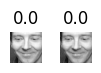

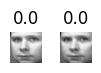

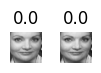

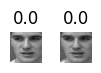

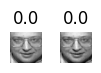

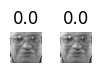

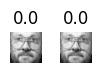

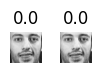

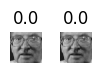

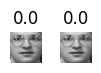

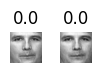

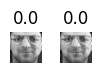

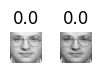

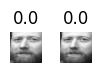

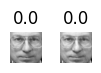

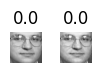

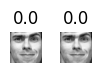

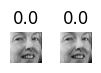

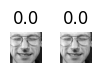

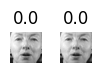

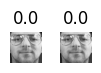

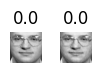

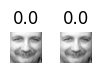

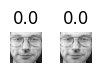

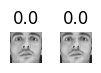

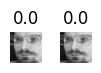

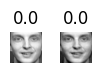

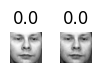

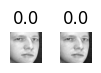

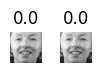

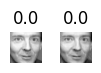

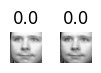

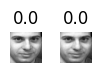

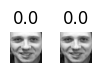

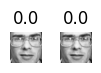

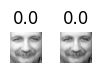

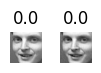

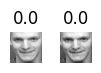

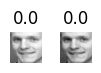

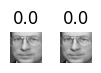

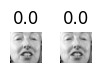

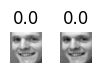

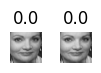

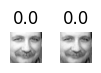

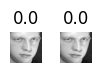

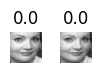

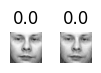

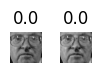

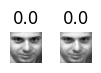

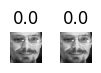

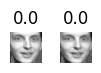

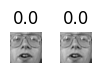

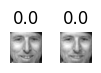

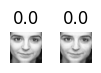

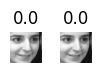

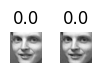

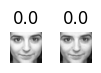

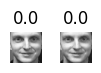

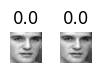

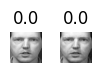

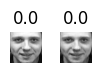

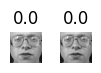

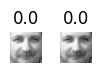

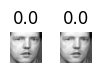

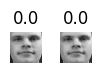

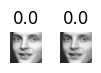

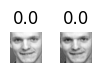

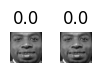

In [137]:
# Reconstruct the original images from the reduced ones
X_train_reconstructed = pca.inverse_transform(X_train_reduced)

plot_faces_original_and_reconstructed(X_train, X_train_reconstructed)

In [142]:
def reconstruction_error(pca, X):
    X_reduced = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_reduced)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [143]:
reconstruction_error(pca, X_train).mean()

0.00019202355

In [145]:
reconstruction_error(pca, bad_faces).mean()

0.005308663

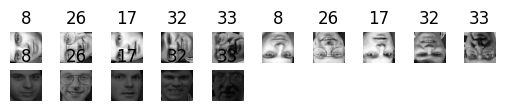

In [146]:
plot_faces(bad_faces, y_bad)

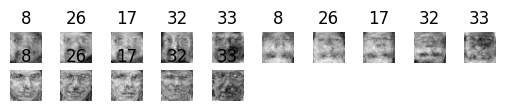

In [148]:
bad_faces_reduced = pca.transform(bad_faces)
bad_faces_reconstructed = pca.inverse_transform(bad_faces_reduced)
plot_faces(bad_faces_reconstructed, y_bad)